# 선형 회귀(Linear Regression)

### 1. 간단한 예제

In [ ]:
import torch
x = torch.Tensor(2,3) # 2*3 형태의 임의의 난수
y = torch.Tensor([[1,2,3],[4,5,6]]) # 원하는 인수 삽입 가능
print(x)
print(y)

tensor([[1.7564e-04, 1.0093e-08, 2.6216e+20],
        [8.4338e-07, 5.1429e-11, 7.1450e+31]])
tensor([[1., 2., 3.],
        [4., 5., 6.]])


In [ ]:
# z = 2x^2 + 3에서 x에 대한 기울기를 구하는 code

x = torch.tensor(data = [2.0,3.0], requires_grad=True) # requires_grad : 텐서에 대한 기울기를 저장할지 여부 지정, default는 F
y = x**2
z = 2*y + 3

target = torch.Tensor([3.0,4.0])
loss = torch.sum(torch.abs(z-target))
loss.backward()

print(x.grad, y.grad, z.grad)

tensor([ 8., 12.]) None None


C:\Users\WIN\AppData\Local\Temp\ipykernel_13424\1019034061.py:9: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten\src\ATen/core/TensorBody.h:485.)
  print(x.grad, y.grad, z.grad)


### 2. 라이브러리 로드

In [ ]:
import numpy as np
import torch

import torch.nn as nn # 인공신경망 연산
import torch.optim as optim # optimizer
import torch.nn.init as init # tensor 초기화
import matplotlib.pyplot as plt

### 3. 데이터 생성

In [ ]:
num_data = 1000
num_epoch = 500

noise = init.normal_(torch.FloatTensor(num_data,1), std= 0.2)
x = init.uniform_(torch.Tensor(num_data,1),-10,10) # -10~10까지 균등하게 초기화

y = 2*x + 3

y_noise = y+noise # 측정과정에서 noise가 추가되는 경우가 많기 때문에, y에 noise를 더한 값을 target value로 사용

### 4. 데이터 시각화

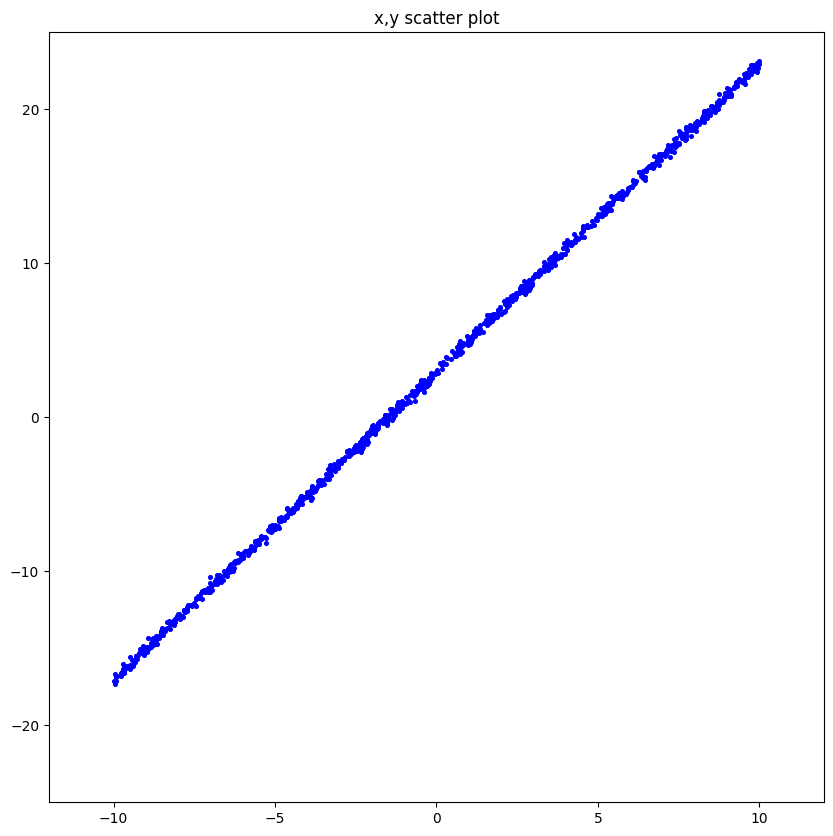

In [ ]:
plt.figure(figsize = (10,10))

plt.scatter(x.numpy(), y_noise.numpy(), s=7, c = 'blue')
plt.axis([-12,12,-25,25]) # x,y 축 범위 지정
plt.title('x,y scatter plot')
plt.show()

### 5. 모델, 손실함수, 최적화 함수 설정

In [ ]:
# 입력으로 들어오는 x가 1000x1 의 형태를 가지고 있고 여기서 특성의 개수는 1개이기 때문에 앞에 1이 들어가게 됩니다. Linear(1,?)
# 출력으로 기대하는 값 또한 1000x1 의 형태이기 때문에 특성의 개수가 1개. 그렇기 때문에 뒤에 1이 들어갑니다.      Linear(?,1)

model = nn.Linear(1,1) 
loss_func = nn.L1Loss()
optimizer = optim.SGD(model.parameters(), lr = 0.01)

### 6. 모델 학습 및 중간 확인

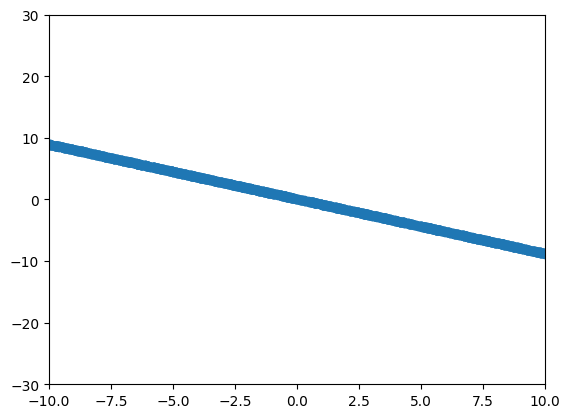

tensor(14.4456)


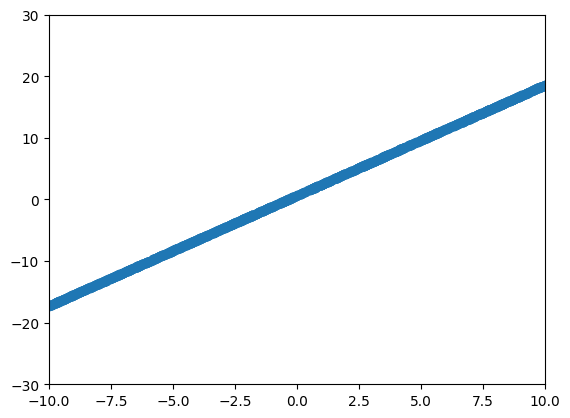

tensor(2.3501)


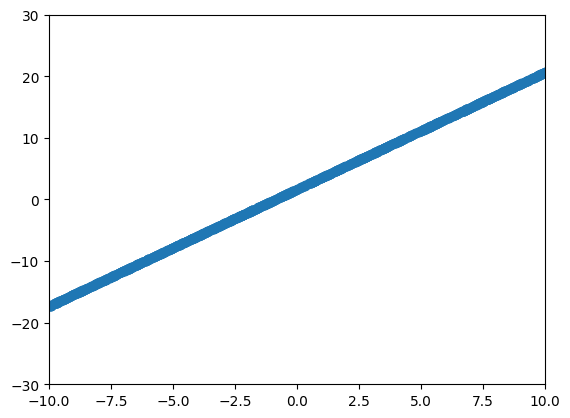

tensor(1.3444)


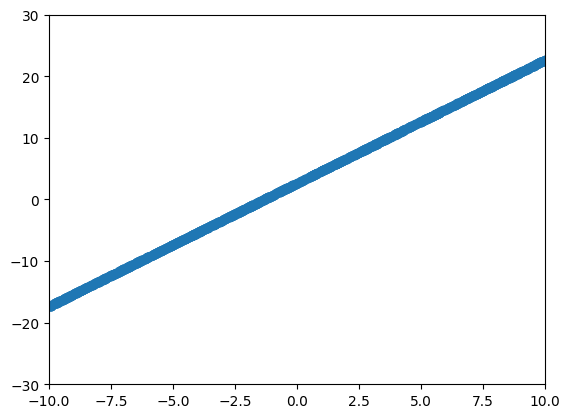

tensor(0.3551)


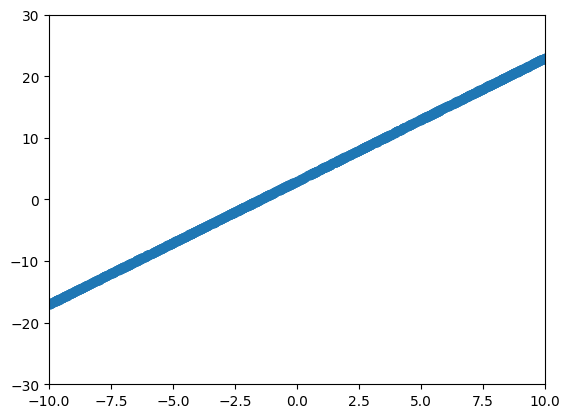

tensor(0.1594)


In [ ]:
loss_arr = [] # 손실 변화 기록

label = y_noise

for i in range(num_epoch):
    
    optimizer.zero_grad()
    output = model(x)
    loss = loss_func(output, label)
    loss.backward()
    optimizer.step()
    
    if i % 100 == 0:
        plt.scatter(x.detach().numpy(), output.detach().numpy())
        plt.axis([-10,10,-30,30])
        plt.show()
        print(loss.data)
    
    loss_arr.append(loss.detach().numpy())

### 7. 학습 후 데이터와 모델 결과값 확인

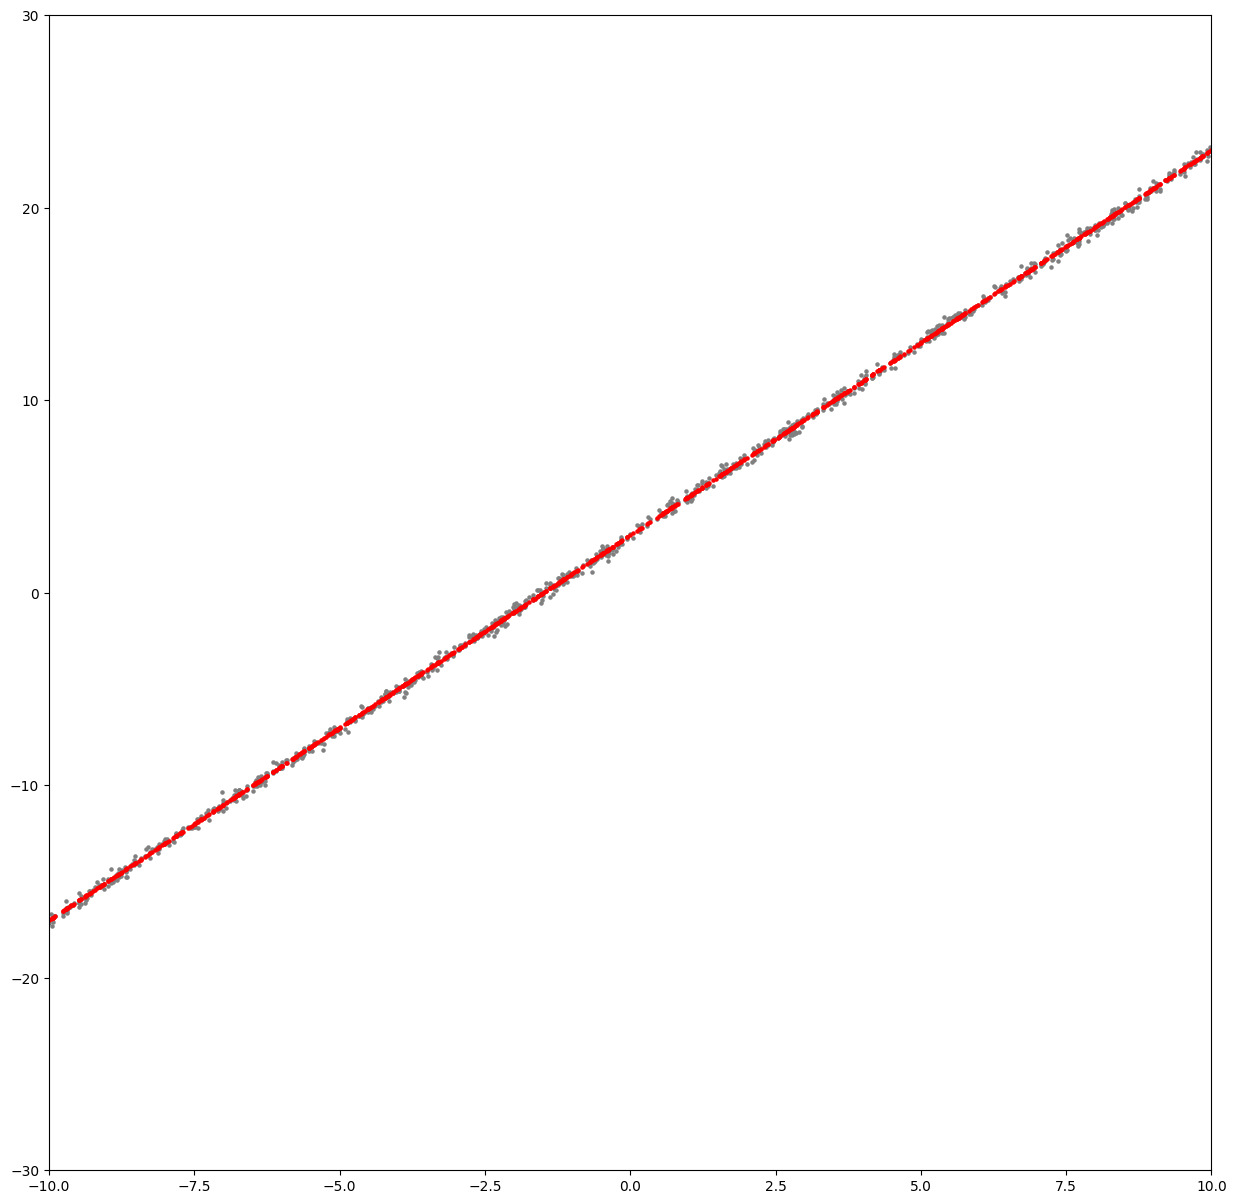

In [ ]:
plt.figure(figsize=(15,15))
plt.scatter(x.numpy(),y_noise.numpy(),s=5,c="gray")
plt.scatter(x.detach().numpy(),output.detach().numpy(),s=5,c="red")
plt.axis([-10, 10, -30, 30])
plt.show()

### 8. 손실 그래프

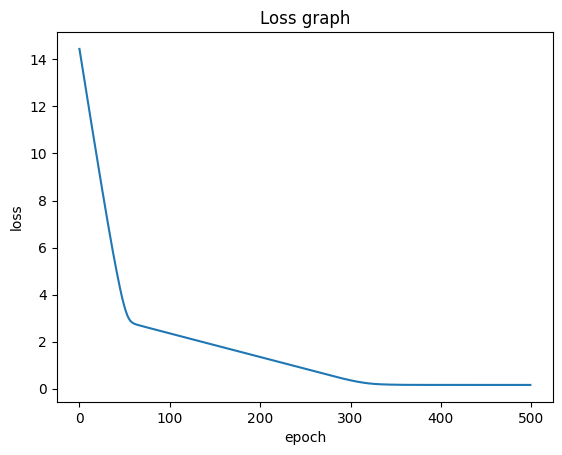

In [ ]:
plt.plot(loss_arr)

plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Loss graph')
plt.show()

### 9. 학습 후 모델 변수 값 확인

In [ ]:
param_list = list(model.parameters())
print("Weight:",param_list[0].item(),"\nBias:  ",param_list[1].item()) # nn.Linaer은 weight와 bias를 변수로 가지고 있음

Weight: 2.00058913230896 
Bias:   2.99436616897583
